In [114]:
import os 
import pandas as pd
import seaborn as sns

In [115]:

folder_path = "/home/onyxia/work/Python_Project_2A/data/RTE"
files = [f for f in os.listdir(folder_path) if f.endswith(".xls")]

dfs = []
for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, sep='\t', encoding='latin-1')
    dfs.append(df)
    print(file_path)

df_ele = pd.concat(dfs, ignore_index=True)
# combined_df.to_csv("data_ele_2020-2024.csv", index=False)
# print(f"shape:{df_ele.shape}")


/tmp/ipykernel_6273/4214978603.py:7: DtypeWarning: Columns (12,13,14,15,18,20,21,22,24,30,32,33,34,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', encoding='latin-1')


/home/onyxia/work/Python_Project_2A/data/RTE/eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2021.xls
/home/onyxia/work/Python_Project_2A/data/RTE/eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2020.xls
/home/onyxia/work/Python_Project_2A/data/RTE/eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2023.xls
/home/onyxia/work/Python_Project_2A/data/RTE/eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2024.xls
/home/onyxia/work/Python_Project_2A/data/RTE/eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2022.xls


In [116]:
df_ele.tail()

,Périmètre,Nature,Date,Heures,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,...,TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Unnamed: 67,Unnamed: 65,Unnamed: 29
175392,Ile-de-France,Données définitives,2022-12-31,23:00,7227.0,255.0,0.0,133.0,0.0,8.0,...,91.72,0.0,0.0,0.11,42.11,1.67,37.93,NaN,NaN,NaN
175393,Ile-de-France,Données définitives,2022-12-31,23:15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175394,Ile-de-France,Données définitives,2022-12-31,23:30,7128.0,257.0,0.0,131.0,0.0,8.0,...,90.34,0.0,0.0,0.11,42.11,1.74,38.87,NaN,NaN,NaN
175395,Ile-de-France,Données définitives,2022-12-31,23:45,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175396,RTE ne pourra être tenu responsable de l'usage...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df_ele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175397 entries, 0 to 175396
Data columns (total 70 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   Périmètre                                                     175397 non-null  object 
 1   Nature                                                        175392 non-null  object 
 2   Date                                                          175392 non-null  object 
 3   Heures                                                        175392 non-null  object 
 4   Consommation                                                  87696 non-null   float64
 5   Thermique                                                     87696 non-null   float64
 6   Nucléaire                                                     87696 non-null   object 
 7   Eolien                                                  

In [118]:
df_ele = df_ele.drop(columns=['Unnamed: 67','Unnamed: 65','Unnamed: 29'])

In [119]:
feauture = ['Périmètre','Nature','Date','Heures','Consommation']
df_con = df_ele[feauture].copy()


In [120]:
df_con.isnull().sum()

Périmètre           0
Nature              5
Date                5
Heures              5
Consommation    87701
dtype: int64

<Axes: >

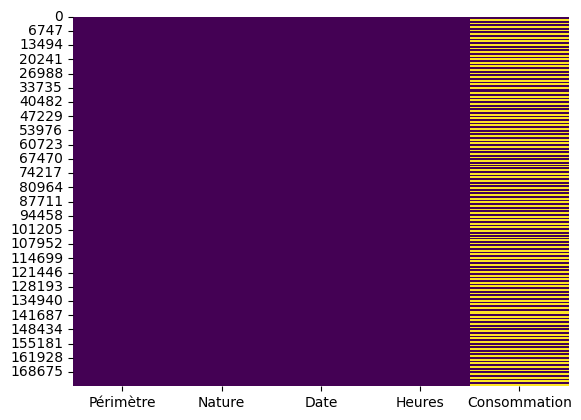

In [121]:
sns.heatmap(df_con.isnull(),cbar=False,cmap='viridis')

### Distribution of consommation before drop NaN

array([[<Axes: title={'center': 'Consommation'}>]], dtype=object)

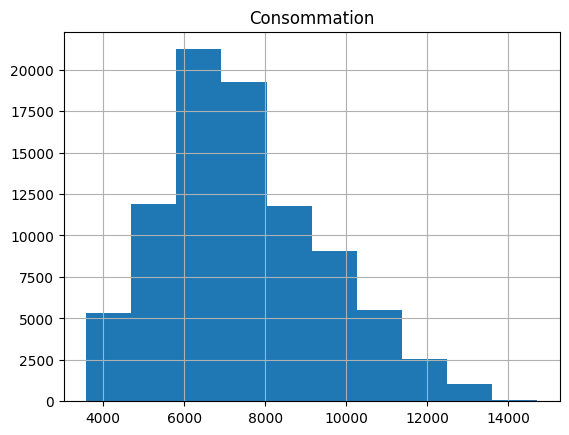

In [122]:
df_con[['Consommation']].hist()

In [123]:
df_con = df_con.dropna()

### Distribution of consommation after dropping NaN

array([[<Axes: title={'center': 'Consommation'}>]], dtype=object)

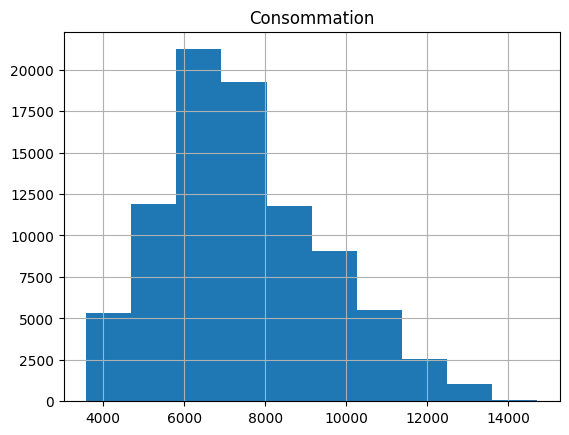

In [124]:
df_con[['Consommation']].hist()

<Axes: >

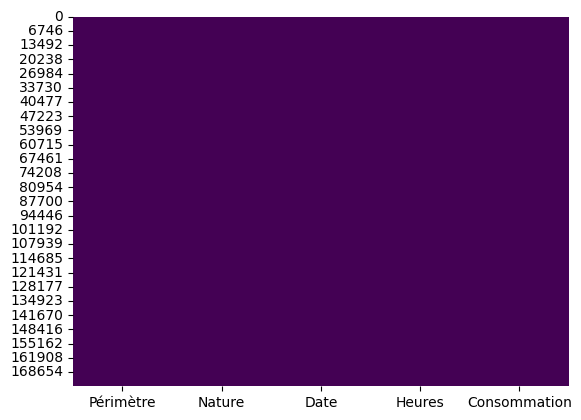

In [125]:
sns.heatmap(df_con.isnull(),cbar=False,cmap='viridis')

In [126]:
df_con.to_csv("data_ele-2020-2024.csv", index=False)